# Transfer Learning

In the Previous Excersise we generated an upgraded model with Hyper parameter tunning that had this characteristics:



```plaintext
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      2368      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 75, 75, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 128)       18560     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 37, 37, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 256)       295168    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 18, 18, 256)       0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 82944)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               42467840  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
=================================================================
Total params: 42784449 (163.21 MB)
Trainable params: 42784449 (163.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
```

Transfer Learning is a technique in machine learning where I can take a model that’s already been trained on a large dataset and adapt it to a new task. Instead of building a model from scratch, I can use a pre-trained model that has already learned to recognize features like edges, textures, and patterns. This is a huge advantage because it cuts down on training time and reduces the amount of data needed for my own project, especially when resources are limited.

In my project, I’ll be using Transfer Learning to leverage a pre-trained model that’s been optimized for image classification tasks. Models like ResNet or VGG have already learned to detect general visual features that are important for recognizing objects in images. These lower layers will be useful for my task of identifying defects in metal casting parts. By fine-tuning the higher layers of the model, I can adapt it to specifically recognize the differences between defective and non-defective parts.

This approach makes a lot of sense for me because my dataset of metal parts may not be as large as other general datasets, and training a model from scratch would be time-consuming and require a lot of computational resources. Transfer Learning lets me build on an existing model’s strengths, speeding up the process and improving the accuracy of my defect classification task.

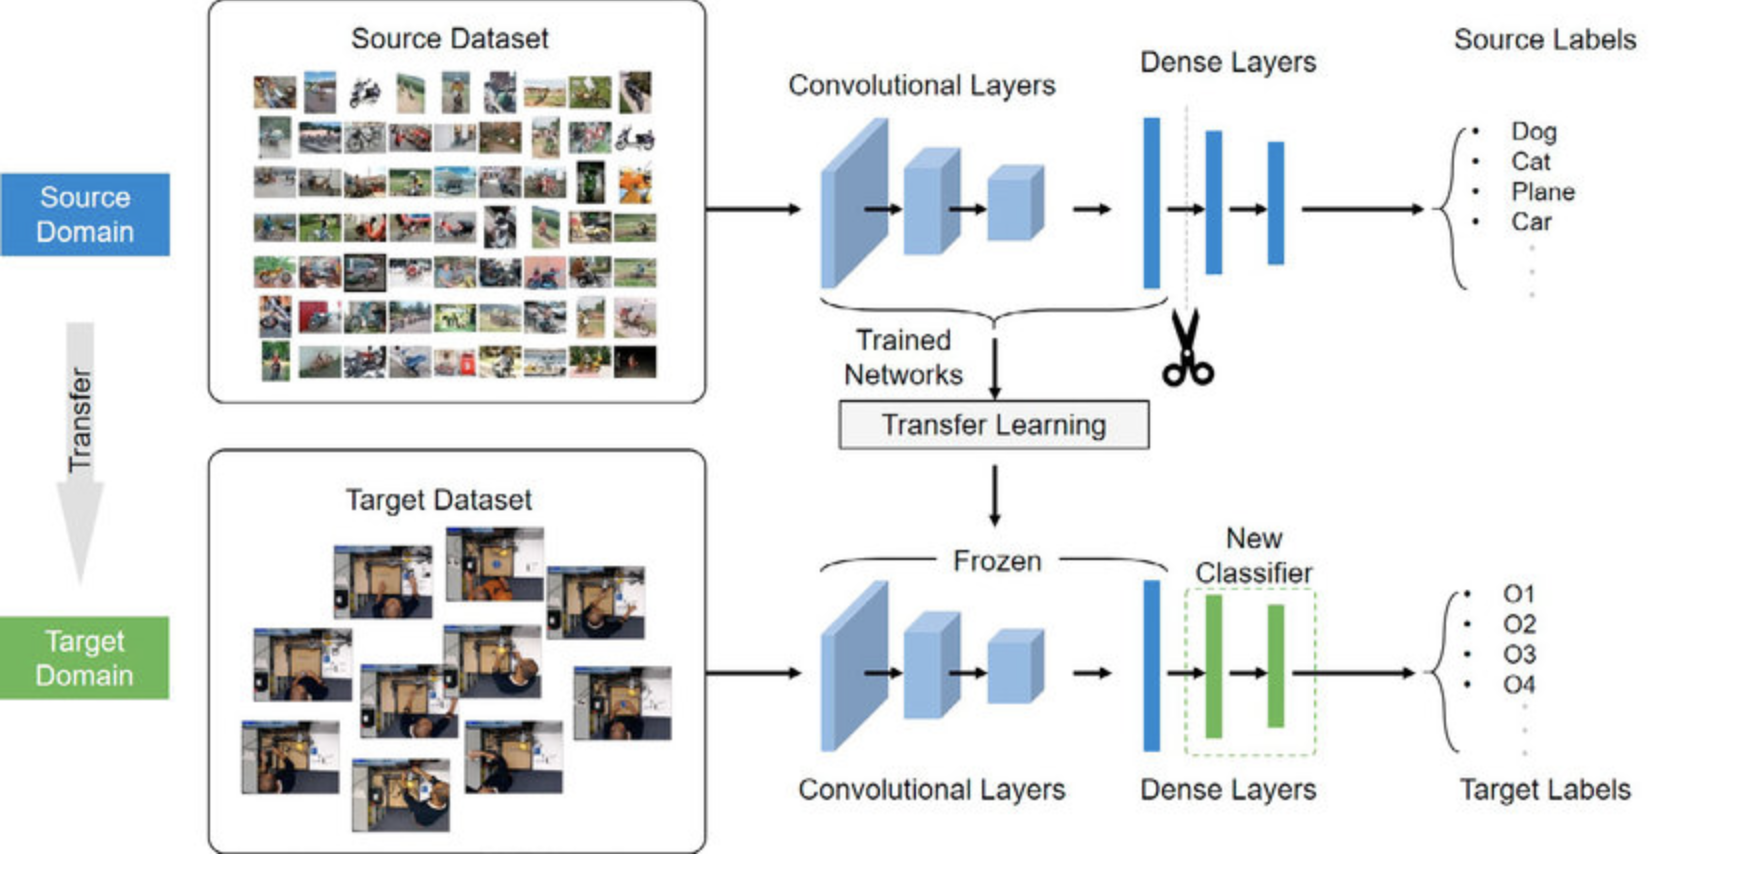

## This was my original model: 

In [24]:
# import the model best_image_classification_model.h5
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
import sys

# load the model
model = load_model('best_image_classification_model.h5')

# Model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      2368      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 128)       18560     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 256)       0

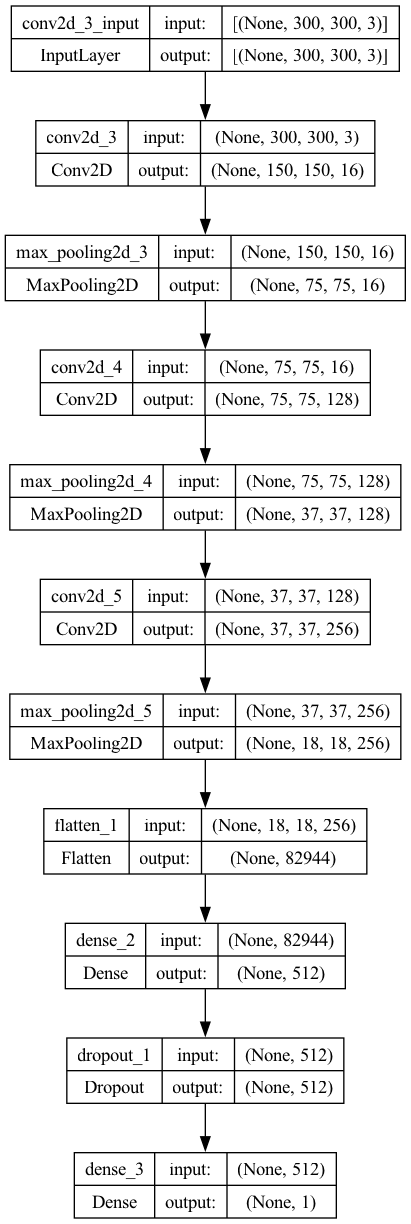

In [4]:
#Import tf
import tensorflow as tf

# Visualize the model using graphviz
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


## Accuracy of the model was: 98.88% 

Let's see what can be done to improve the model with transfer learning

# Transfer Learning

## Train Keras VGG16 model trained with my Industrial Metal Casting Pictures

I chose to use VGG16 for transfer learning in my application for detecting OK and defective parts because it has been pre-trained on the ImageNet dataset, which consists of over 14 million images across 1,000 categories.
 VGG16 has a total of 16 layers, and in my model, I’m using its first 13 convolutional layers as a feature extractor.
 By leveraging these pre-trained layers, I can take advantage of VGG16's ability to recognize complex patterns such as edges and textures, which helps in distinguishing between OK and defective parts efficiently. 
 This approach reduces the need for large amounts of data and significantly speeds up training time.

In my implementation, I froze the 13 convolutional layers of VGG16 to retain the knowledge it gained from ImageNet, and I added custom dense and dropout layers on top to tailor the model specifically to my task.
This combination allows the model to focus on features relevant to my dataset while preventing overfitting. 
The ability to use VGG16's layers ensures a strong foundation for accurate predictions, while the custom layers ensure the model adapts to my specific problem.

By using transfer learning, I avoid the challenges of building a model from scratch, such as slow convergence and overfitting, especially with a limited dataset.
 VGG16's pre-trained layers make it ideal for tasks like mine, where subtle defects need to be detected quickly and accurately.
  Fine-tuning is always an option if I need to improve performance further, making VGG16 a flexible and powerful tool for real-world applications like defect detection in manufacturing.

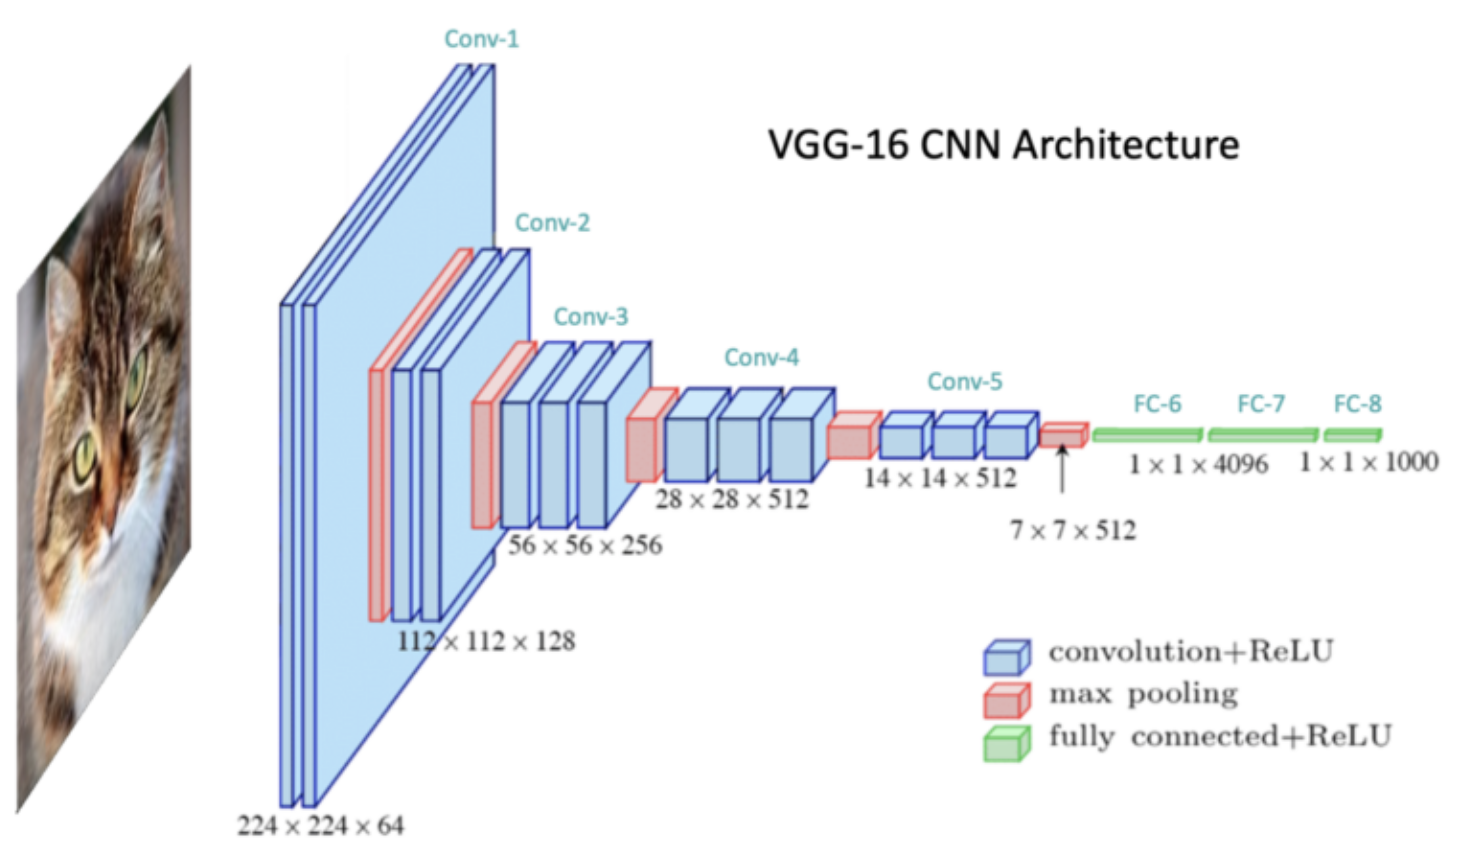

In [16]:
from keras.models import load_model, Sequential
from keras.applications import VGG16
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam

# Load a pre-trained model: VGG16 without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

# Freeze the pre-trained model's layers so they aren't retrained initially
for layer in base_model.layers:
    layer.trainable = False

# Create a new model and add the pre-trained model as the base
transfer_model = Sequential()

# Add the pre-trained base model
transfer_model.add(base_model)

# Add a Flatten layer to flatten the output from the pre-trained model
transfer_model.add(Flatten())

# Add Dense layers (similar to my existing model)
transfer_model.add(Dense(512, activation='relu'))
transfer_model.add(Dropout(0.5))
transfer_model.add(Dense(1, activation='sigmoid'))

# Compile the model
transfer_model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
transfer_model.summary()

58889256/58889256 [==============================] - 5s 0us/step


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 9, 9, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 512)               21234176  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 35949377 (137.14 MB)
Trainable params: 21234689 (81.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


Train the Keras VGG16:

In [17]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

# Data generators for training and testing data
train_dir = "Pictures/train"
test_dir = "Pictures/test"

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Early stopping callback to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = transfer_model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    callbacks=[early_stop]
)

# Evaluate the model
test_loss, test_accuracy = transfer_model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Found 7487 images belonging to 2 classes.
Found 715 images belonging to 2 classes.
Epoch 1/10
234/234 [==============================] - 477s 2s/step - loss: 0.5017 - accuracy: 0.7711 - val_loss: 0.2010 - val_accuracy: 0.9455
Epoch 2/10
234/234 [==============================] - 510s 2s/step - loss: 0.2284 - accuracy: 0.9193 - val_loss: 0.0969 - val_accuracy: 0.9888
Epoch 3/10
234/234 [==============================] - 496s 2s/step - loss: 0.1477 - accuracy: 0.9545 - val_loss: 0.0776 - val_accuracy: 0.9888
Epoch 4/10
234/234 [==============================] - 494s 2s/step - loss: 0.1141 - accuracy: 0.9671 - val_loss: 0.0512 - val_accuracy: 0.9916
Epoch 5/10
234/234 [==============================] - 472s 2s/step - loss: 0.1078 - accuracy: 0.9662 - val_loss: 0.0524 - val_accuracy: 0.9902
Epoch 6/10
234/234 [==============================] - 470s 2s/step - loss: 0.0900 - accuracy: 0.9729 - val_loss: 0.0368 - val_accuracy: 0.9930
Epoch 7/10
234/234 [==============================] - 467s 

# Nice! 99.3% Accuracy!

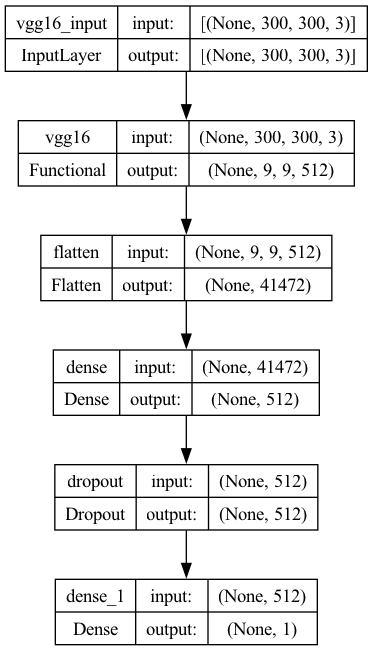

In [19]:
# Visualize the model using graphviz
tf.keras.utils.plot_model(transfer_model, to_file='model.png', show_shapes=True, show_layer_names=True)

23/23 [==============================] - 64s 3s/step - loss: 0.0590 - accuracy: 0.9902
Test Loss: 0.05897621810436249
Test Accuracy: 0.9902098178863525
23/23 [==============================] - 65s 3s/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       453
           1       0.97      1.00      0.99       262

    accuracy                           0.99       715
   macro avg       0.99      0.99      0.99       715
weighted avg       0.99      0.99      0.99       715



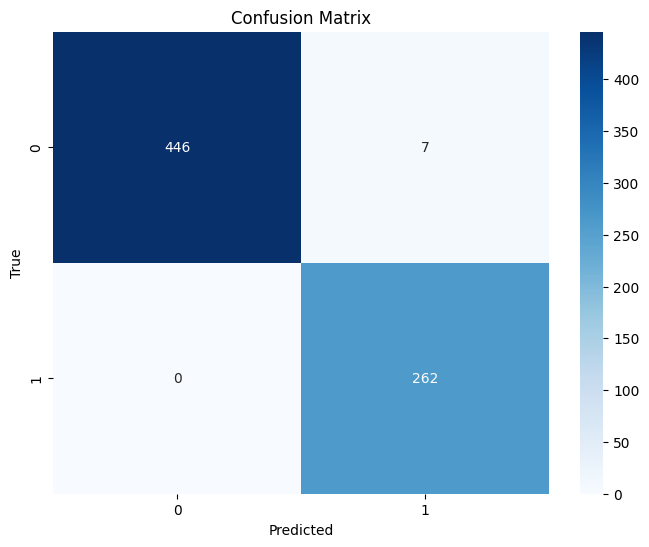

In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model on the test data
test_loss, test_accuracy = transfer_model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Get true labels and predicted labels
y_true = test_generator.classes
y_pred = transfer_model.predict(test_generator, verbose=1)
y_pred_classes = np.rint(y_pred).astype(int)  # Round predictions to 0 or 1 for binary classification

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Classification report
print('Classification Report:')
print(classification_report(y_true, y_pred_classes))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## 99% Acuracy! Very similar results obtained with Transfer learning Model compared to my model built from skratch

# Conclusions


In conclusion, both the custom model trained from scratch and the Transfer Learning model performed exceptionally well, achieving accuracies of 98% and 99%, respectively. The minimal difference between the two demonstrates that the model trained from scratch was highly effective for this specific task. However, by using Transfer Learning, I was able to save significant time and computational resources, as the pre-trained model already possessed a strong understanding of general visual features.

The Transfer Learning model achieved such a high accuracy (99%) since the 4th Epoch. 
Further modification of its layers wasn’t necessary.
 This confirms that the pre-trained model’s lower-level feature extraction was well-suited for the task of identifying defects in metal parts, and only minimal fine-tuning was required. This approach not only optimized performance but also streamlined the entire modeling process.